IA & Data science (LU3IN0226) -- 2022-2023
--------
*&copy; Equipe pédagogique: Christophe Marsala, Olivier Schwander, Jean-Noël Vittaut.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

*Karina SAIDENE - Racha Nadine DJEGHALI*

Ce projet peut être fait en binôme (d'un même groupe). Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

Les groupes de plus de 2 personnes ne sont pas autorisés.

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-1</tt> et rajouter à la suite de <tt>projet-1</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-1-Nom1_Nom2.ipynb* 
- *Nom1* et *Nom2* : noms des membres du binôme

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 1 - février-mars 2023


<font size="+1" color="RED"><b>Date de rendu : jeudi 22 mars, 18h au plus tard</b></font>
<br />


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les 2 datasets fournis dans le répertoire data-projet:
- les données data-2D.pkl : données en 2 dimensions, 2 labels
- les données data-5D.pkl : données en 5 dimensions, 2 labels

## Travail à faire

Pour chaque ensemble de données:
- les 3 algorithmes d'apprentissage knn, perceptron et perceptron biais doivent être expérimentés et comparés (ATTENTION: on ne veut que des algorithmes que vous avez implémentés vous-même dans cette UE).
- des résultats d'expérimentations doivent fournir une comparaison des taux de bonne classification apprentissage / test avec validation croisée en 10.
- des courbes (coût, poids, variation d'accuracy,...) doivent être fournies pour étudier les modèles construits.

Vos **expérimentations doivent être expliquées**... (utilisez des boîtes Markdown pour saisir vos explications):
- une argumentation du type *"pourquoi vous avez fait cette expérimentation"* doit être fournie;
- une analyse succincte du résultat fourni doit être aussi donnée.



Par exemple (indicatif): choix de $k$ pour le knn:
- argumentation : pour décider quelle peut être la valeur de $k$ optimale, on décide de tester plusieurs valeurs différentes et de comparer les taux de bonne classification sur la base de test obtenus.
- analyse du résultat: on remarque que la valeur $k$ suivante fournie le meilleur résultat.
- étude du temps d'exécution.


## Travail à rendre
Ce qui doit être rendu : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant uniquement ce notebook, dans lequel vous avez reporté toutes les fonctions que vous utilisez : ce notebook doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). Les fichiers de données ne doivent pas être inclus dans votre archive !



## Lecture des pickles



In [1]:
import sys
sys.path.append('./')  
"""
import Classifiers as classif
import utils as ut
"""

'\nimport Classifiers as classif\nimport utils as ut\n'

In [2]:
# Importation de librairies standards:
import numpy as np
import pandas as pd
import time
import random

# Importation de la librairie pickle
import pickle as pkl
# Importation de librairies standards:

from datetime import datetime as dt
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from scipy.spatial import distance
%matplotlib inline  


# un nouvel import utile pour la 3D:
from matplotlib import cm

# Les instructions suivantes sont TRES utiles pour recharger automatiquement 
# le code modifié dans les librairies externes
%load_ext autoreload
%autoreload 2

# lecture des donnéees en dimension 2 dans un dataframe pandas
#data2D = pkl.load(open('data-projet/data-2D.pkl', 'rb')) 
data2D = pkl.load(open('./data-2D.pkl', 'rb')) 
X2D = np.array(data2D[['x1', 'x2']], dtype=float) # conversion de type pour une meilleure compatibilité
Y2D = np.array(data2D['label'], dtype=float)

# pour les données en dimension 5, la méthode est la même, modifier seulement les noms des colonnes
#data5D = pkl.load(open('data-projet/data-5D.pkl', 'rb')) 
data5D = pkl.load(open('data-5D.pkl', 'rb')) 
X5D = np.array(data5D[['x1', 'x2','x3', 'x4','x5']], dtype=float) # conversion de type pour une meilleure compatibilité
Y5D = np.array(data5D['label'], dtype=float)


In [3]:
data2D[0:5]

,x1,x2,label
0,0.830557,-2.250314,-1
1,0.627488,-2.533405,-1
2,-1.279837,-1.630564,-1
3,2.002088,-3.415239,-1
4,3.141847,-0.376081,-1


In [4]:
X2D[0:5]

array([[ 0.83055692, -2.25031368],
       [ 0.62748844, -2.53340502],
       [-1.27983681, -1.63056446],
       [ 2.00208794, -3.41523902],
       [ 3.14184699, -0.37608089]])

In [5]:
Y2D[0:5]

array([-1., -1., -1., -1., -1.])

In [6]:
data5D[0:5]

,x1,x2,x3,x4,x5,label
0,-0.472352,-0.035994,0.572799,2.017446,-1.865967,-1
1,1.993913,0.984667,-1.180237,1.460067,-0.195743,-1
2,0.923188,1.194008,0.065319,0.909784,0.832256,-1
3,2.540148,-0.427836,-0.113014,3.257095,-1.689755,-1
4,4.331413,0.590868,-1.105335,4.475987,-1.790176,-1


In [7]:
X5D[0:5]

array([[-0.4723522 , -0.03599385,  0.57279854,  2.01744639, -1.86596742],
       [ 1.9939134 ,  0.9846668 , -1.18023654,  1.46006741, -0.19574327],
       [ 0.92318832,  1.19400787,  0.06531872,  0.90978449,  0.83225595],
       [ 2.54014784, -0.42783646, -0.11301444,  3.2570952 , -1.68975456],
       [ 4.33141251,  0.59086794, -1.10533473,  4.47598742, -1.79017634]])

In [8]:
Y5D[0:5]

array([-1., -1., -1., -1., -1.])

# Classification de données de dimansion 5 & 2  :

## Nos Classifiers : 



In [9]:
class Classifier:
    """ Classe (abstraite) pour représenter un classifieur
        Attention: cette classe est ne doit pas être instanciée.
    """
    
    def __init__(self, input_dimension):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension de la description des exemples
            Hypothèse : input_dimension > 0
        """

        raise NotImplementedError("Please Implement this method")
        
    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """        
        raise NotImplementedError("Please Implement this method")
    
    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")
    
    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        raise NotImplementedError("Please Implement this method")

    def accuracy(self, desc_set, label_set):
        """ Permet de calculer la qualité du système sur un dataset donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """
        cpt=0
        for i in range(len(desc_set)):
          if(self.predict(desc_set[i])==label_set[i]):
            cpt+=1
        return cpt/len(desc_set)

## Classifier KNN : 

In [10]:
class ClassifierKNN(Classifier):
    """ Classe pour représenter un classifieur par K plus proches voisins.
        Cette classe hérite de la classe Classifier
    """

    # ATTENTION : il faut compléter cette classe avant de l'utiliser !
    
    def __init__(self, input_dimension, k):
        """ Constructeur de Classifier
            Argument:
                - intput_dimension (int) : dimension d'entrée des exemples
                - k (int) : nombre de voisins à considérer
            Hypothèse : input_dimension > 0
        """
        self.input_dimension=input_dimension
        self.k = k
    def score(self,x):
        """ rend la proportion de +1 parmi les k ppv de x (valeur réelle)
            x: une description : un ndarray
        """
        
        dist = np.linalg.norm(self.desc_set-x, axis= 1)
        argSorted = np.argsort(dist) # Returns the indices that would sort an array
                
        
        proportionClass1 = np.sum(self.label_set[argSorted[:self.k]]==1)
        return 2*(proportionClass1 / self.k - 0.5)
        
    
    
    def predict(self, x):
        """ rend la prediction sur x (-1 ou +1)
            x: une description : un ndarray
        """
        cost = self.score(x)
        if cost>0:
          return 1
        elif cost<0:
          return -1

    def train(self, desc_set, label_set):
        """ Permet d'entrainer le modele sur l'ensemble donné
            desc_set: ndarray avec des descriptions
            label_set: ndarray avec les labels correspondants
            Hypothèse: desc_set et label_set ont le même nombre de lignes
        """       
        self.desc_set=desc_set
        self.label_set=label_set


## Classifier Perceptron :


In [11]:
class ClassifierPerceptron(Classifier):
    """ Perceptron de Rosenblatt
    """
    def __init__(self, input_dimension, learning_rate=0.01, init=True ):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (>0)
                - learning_rate (par défaut 0.01): epsilon
                - init est le mode d'initialisation de w: 
                    - si True (par défaut): initialisation à 0 de w,
                    - si False : initialisation par tirage aléatoire de valeurs petites
        """
        self.init = init
        self.allw = []
        self.learning_rate = learning_rate
        self.input_dimension = input_dimension

        if self.init:
          self.w = np.zeros(self.input_dimension)
        else:
          self.w = np.array([((2 * ( random.randint(0,1))- 1) * 0.001) for i in range(self.input_dimension)])

        self.allw.append(self.w.copy())

    def train_step(self, desc_set, label_set):
        """ Réalise une unique itération sur tous les exemples du dataset
            donné en prenant les exemples aléatoirement.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
        """   
        index_list =[i for i in range(len(desc_set))]
        np.random.shuffle(index_list)

        for x in index_list :
          xi = desc_set[x]
          yHut = np.dot(xi,self.w)
          yi = label_set[x]
          if not (yHut<0 and label_set[x]==-1) and not(yHut>0 and label_set[x]==1) :
            self.w =self.w + np.dot(self.learning_rate*yi,xi)
            self.allw.append(self.w.copy()) # stockage des premiers poids

    def get_allw(self):
        return self.allw
    def train(self, desc_set, label_set, nb_max=100, seuil=0.001):
        """ Apprentissage itératif du perceptron sur le dataset donné.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
                - nb_max (par défaut: 100) : nombre d'itérations maximale
                - seuil (par défaut: 0.001) : seuil de convergence
            Retour: la fonction rend une liste
                - liste des valeurs de norme de différences
         """
        differenceNorm = []
        iter = 0 

        ancienW = self.w.copy()
        self.train_step(desc_set , label_set ) 
        conv = np.linalg.norm(ancienW-self.w)
        differenceNorm.append(conv)
        
        while ( iter != nb_max and conv > seuil) :
          iter += 1
          ancienW = self.w.copy()
          self.train_step(desc_set , label_set ) 
          conv = np.linalg.norm(ancienW-self.w)
          differenceNorm.append(conv)

        return differenceNorm  

    def score(self,x):
        """ rend le score de prédiction sur x (valeur réelle)
            x: une description
        """
        return np.dot(x,self.w)


    def predict(self, x):
        """ rend la prediction sur x (soit -1 ou soit +1)
            x: une description
        """
        if self.score(x)<0:
          return -1
        else:
          return 1

## Classifier Perceptron Biais :

In [12]:
class ClassifierPerceptronBiais(ClassifierPerceptron):
    """ Perceptron de Rosenblatt avec biais
        Variante du perceptron de base
    """
    def __init__(self, input_dimension, learning_rate=0.01, init=True):
        """ Constructeur de Classifier
            Argument:
                - input_dimension (int) : dimension de la description des exemples (>0)
                - learning_rate (par défaut 0.01): epsilon
                - init est le mode d'initialisation de w: 
                    - si True (par défaut): initialisation à 0 de w,
                    - si False : initialisation par tirage aléatoire de valeurs petites
        """
        # Appel du constructeur de la classe mère
        super().__init__(input_dimension, learning_rate, init)
        # Affichage pour information (décommentez pour la mise au point)
        print("Init perceptron biais: w= ",self.w," learning rate= ",learning_rate)
        
    def train_step(self, desc_set, label_set):
        """ Réalise une unique itération sur tous les exemples du dataset
            donné en prenant les exemples aléatoirement.
            Arguments:
                - desc_set: ndarray avec des descriptions
                - label_set: ndarray avec les labels correspondants
        """        
        ### A COMPLETER !
        index_list =[i for i in range(len(desc_set))]
        np.random.shuffle(index_list)

        for x in index_list :
          xi = desc_set[x]
          yHut = np.dot(xi,self.w)
          yi = label_set[x]
          if yHut*yi < 1 :
            self.w = self.w + self.learning_rate*(yi-yHut)*xi
            self.allw.append(self.w.copy()) # stockage des premiers poids
        # Ne pas oublier d'ajouter les poids à allw avant de terminer la méthode

## Crossval :
Générattion de data set d'apprentissage et de test :

In [13]:
def crossval(X, Y, n_iterations, iteration):
    Xtest = X[iteration * len(X) // n_iterations : ((iteration + 1)*len(X)// n_iterations)]
    Ytest = Y[iteration * len(Y) // n_iterations : ((iteration + 1)*len(Y)// n_iterations)]

    Xapp1 = X[:iteration * len(X) // n_iterations ] 
    Xapp2=  X[((iteration + 1)*len(X)// n_iterations):]

    Xapp = np.concatenate(( np.array(Xapp1) , np.array(Xapp2)))

    Yapp1 = Y[:iteration * len(X) // n_iterations ] 
    Yapp2=  Y[((iteration + 1)*len(X)// n_iterations):]


    Yapp = np.concatenate(( np.array(Yapp1) , np.array(Yapp2))) 
    return Xapp, Yapp,Xtest, Ytest

## Crossval strat : 

In [14]:
def crossval_strat(X, Y, n_iterations, iteration):

    XtrainPos , YtrainPos , XtestPos , YtestPos = crossval(X[Y==1],Y[Y==1],n_iterations,iteration)
    XtrainNeg , YtrainNeg , XtestNeg , YtestNeg = crossval(X[Y==-1],Y[Y==-1],n_iterations,iteration)
    Xapp = np.concatenate((XtrainPos,XtrainNeg))
    Yapp = np.concatenate((YtrainPos,YtrainNeg))
    Xtest = np.concatenate((XtestPos,XtestNeg))
    Ytest = np.concatenate((YtestPos,YtestNeg))
    
    return Xapp, Yapp, Xtest, Ytest

## Plot Frontiere

In [15]:
def plot_frontiere(desc_set, label_set, classifier, step=30):
    """ desc_set * label_set * Classifier * int -> NoneType
        Remarque: le 4e argument est optionnel et donne la "résolution" du tracé: plus il est important
        et plus le tracé de la frontière sera précis.        
        Cette fonction affiche la frontière de décision associée au classifieur
    """
    mmax=desc_set.max(0)
    mmin=desc_set.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    
    # calcul de la prediction pour chaque point de la grille
    res=np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res=res.reshape(x1grid.shape)
    # tracer des frontieres
    # colors[0] est la couleur des -1 et colors[1] est la couleur des +1
    plt.contourf(x1grid,x2grid,res,colors=["darksalmon","skyblue"],levels=[-1000,0,1000])

def plot2DSet(desc,labels):    
    """ ndarray * ndarray -> affichage
        la fonction doit utiliser la couleur 'red' pour la classe -1 et 'blue' pour la +1
    """
    data2_negatifs = desc[labels == -1]
    data2_positifs = desc[labels == +1]
    plt.scatter(data2_negatifs[:,0],data2_negatifs[:,1],marker='o', color="red")
    plt.scatter(data2_positifs[:,0],data2_positifs[:,1],marker='x', color="blue")

## Calcul de coût :

In [16]:
def cout(allw,X,Y):
  costs = []
  for w in allw:
    result = 0
    for i in range( len(X)) :
      score = 1 - Y[i]* np.dot(X[i],w)
      if score > 0 :
        result += score
    costs.append(result)
  return costs

    


***Tests sur le KNN Classifier :***

Afin de choisir un k optimal pour notre classificateur KNN , nous avons decidé d'utiliser  la méthode de la validation croisée. 



> Cette méthode consiste à diviser nos données en partitions, puis à entraîner le modèle KNN sur une partitions et à le tester sur la partition restante. 
Le k optimal est celui qui donne la meilleure performance moyenne sur l'ensemble des partitions de test.



## Analyse de performance


In [17]:
def analyse_perfs(L):
    """ L : liste de nombres réels non vide
        rend le tuple (moyenne, écart-type)
    """
    return np.mean(L), np.var(L)

## Test Classifier KNN sur Jeux de données à 2 dimensions

In [18]:
start1 = time.time()
# Pour avoir les mêmes valeurs aléatoires :
np.random.seed(42)

#Melange des index
index = np.random.permutation(len(X2D)) 
X2DM = X2D[index]
Y2DM = Y2D[index]

# on stocke les accuracies dans une liste :
accuracies2D_moy = []
accuracies2D_ecart = []


temps_execution2D=[]
# seuil max des valeurs de k à regarder:
seuil_k = len(X2D) // 2

# toutes les valeurs de k à regarder:
valeurs_k = [k for k in range(1,seuil_k,20)]
for k in valeurs_k :
  niter = 10
  occur_perK = []
  occur_moyen = 0
  occur_ecart_type = 0
  classifierKNN2 = ClassifierKNN(2,k)
  temps_execution2D_bis = []
  for i in range(niter):
    start = time.time()
    Xapp,Yapp,Xtest,Ytest = crossval_strat(X2DM, Y2DM, niter, i)
    # Création d'un knn avec k=5 et 2 dimensions pour les données
    # Entraînement du classifier:
    classifierKNN2.train(Xapp, Yapp)
    occur_perK.append(classifierKNN2.accuracy(Xtest,Ytest))
    temps_execution2D_bis.append(time.time()-start)
  temps_execution2D.append(np.mean(temps_execution2D_bis))
  occur_moyen = np.mean(occur_perK)
  occur_ecart_type = np.var(occur_perK)
  print("valeur de k = ",k, "occurence moyenne = ", occur_moyen)
  print("valeur de k = ",k, "ecart-type occurence  = ", occur_ecart_type)
  # Performance de ce classifieur:
  accuracies2D_moy.append(occur_moyen)
  accuracies2D_ecart.append(occur_ecart_type)
  
print("Le temps d'execution total est de : ", time.time()-start1)


valeur de k =  1 occurence moyenne =  0.884
valeur de k =  1 ecart-type occurence  =  0.000559000000000001
valeur de k =  21 occurence moyenne =  0.924
valeur de k =  21 ecart-type occurence  =  9.899999999999945e-05
valeur de k =  41 occurence moyenne =  0.9215000000000002
valeur de k =  41 ecart-type occurence  =  8.525000000000015e-05
valeur de k =  61 occurence moyenne =  0.9209999999999999
valeur de k =  61 ecart-type occurence  =  0.00011900000000000022
valeur de k =  81 occurence moyenne =  0.9225
valeur de k =  81 ecart-type occurence  =  0.00013124999999999945
valeur de k =  101 occurence moyenne =  0.9235
valeur de k =  101 ecart-type occurence  =  9.02499999999998e-05
valeur de k =  121 occurence moyenne =  0.9225000000000001
valeur de k =  121 ecart-type occurence  =  9.124999999999978e-05
valeur de k =  141 occurence moyenne =  0.9245000000000001
valeur de k =  141 ecart-type occurence  =  7.224999999999979e-05
valeur de k =  161 occurence moyenne =  0.9240000000000002
val

# Visualisation des graphes des accuracy /temps d'execution en fonction de k :

La valeur optimale de k est de : 141
La performance: (0.9094199999999999, 0.0006584836000000003)


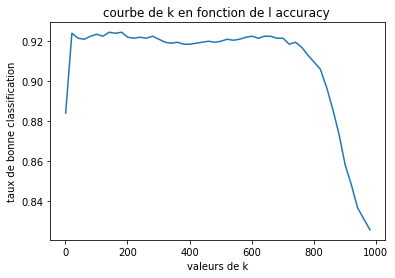

In [19]:
# Traçage de la courbe de k en fonction de l'accuracy 
k_optimal = accuracies2D_moy.index(max(accuracies2D_moy))*20+1
print("La valeur optimale de k est de : "+str(k_optimal))
print("La performance: "+str(analyse_perfs(accuracies2D_moy)))

plt.plot(valeurs_k,accuracies2D_moy)  
plt.ylabel('taux de bonne classification')
plt.xlabel("valeurs de k")
plt.title('courbe de k en fonction de l accuracy ')
plt.show()

**Analyse :** 
La valeur de k qui donne un bon taux de classification est entre 21 et 200 , d'aprés les résultat de notre expérimentation le meilleur k est dans le voisinage de 141

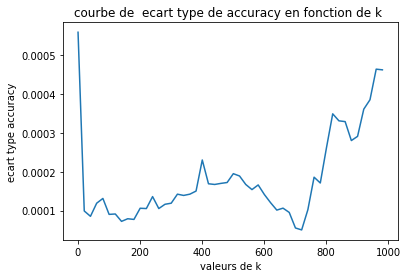

In [20]:
#Tracage courbe de ecart type des accuracy en fonction de k 
plt.plot(valeurs_k,accuracies2D_ecart)  
plt.ylabel('ecart type accuracy')
plt.xlabel("valeurs de k")
plt.title('courbe de  ecart type de accuracy en fonction de k ')
plt.show()

**Analyse :**
On remarque que l'ecart type prend des petites valeurs et decroit globalement ce qui donne un indice sur la robustesse du modéle et montre que notre modéle ne dépend pas du jeux de données 

Nous remarquons aussi que une valeur de K plus petite entraîne une variance plus élevée de l'accuracy. Cela est dû au fait qu'avec une valeur de K plus petite, le modèle peut être plus sensible aux valeurs aberrantes et aux bruits dans les données, ce qui peut entraîner des estimations d'accuracy instables .


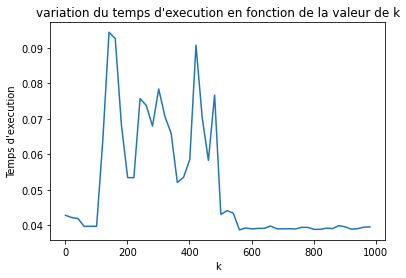

In [21]:
# Tracer le graphe du temps d'execution pour chaque k

plt.plot(valeurs_k,temps_execution2D )  
plt.ylabel('Temps d\'execution')
plt.xlabel("k")
plt.title("variation du temps d'execution en fonction de la valeur de k")
plt.show()

**Analyse :**

Nous remarquons que le temps d 'execution croit avec l'évolution de K puisque pour un K plus grand le modéle doit considerer plus de voisins ce qui implique un traitement plus important donc un temps d'éxécution en plus 

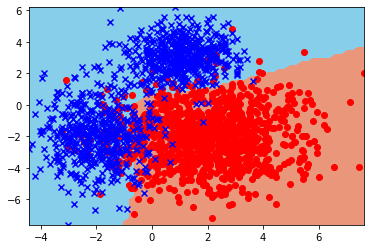

In [22]:
#Affichage de la frontière de séparation des classes pour la meilleure valeur de k trouvée précédemment
classifierKNN2 = ClassifierKNN(2,k_optimal)
niter = 10
classifierKNN2.train(X2D, Y2D)
plot_frontiere(X2D,Y2D,classifierKNN2,step=60)
plot2DSet(X2D,Y2D)

# Test Classifier KNN données à 5 dimensions

In [23]:


index = np.random.permutation(len(X5D)) # mélange des index
X5DMelange = X5D[index]
Y5DMelange = Y5D[index]

dimension = 5 
nbr_iteration = 10
seuil_k =len(X5D) //2

valeurs_k = [k for k in range(1,seuil_k,20)]

accuracies5D_moy= []
accuracies5D_ecart= []
temps_execution5D=[]

# Pour avoir le temps d'exection
start1 = time.time()

print(" KNN Classifier : \n")
for k in valeurs_k:
    occur  = []
    classifierKNN = ClassifierKNN(dimension,k)
    temps_execution5D_bis = []
    for i in range(nbr_iteration):
        start = time.time()
        print("Pour k = ",k, " Iterration numero: ", i)

        Xapp,Yapp,Xtest,Ytest = crossval_strat(X5DMelange, Y5DMelange, nbr_iteration, i)
        classifierKNN.train(Xapp, Yapp)
        occur.append(classifierKNN.accuracy(Xtest, Ytest))
        temps_execution5D_bis.append(time.time()-start)
    moyenne = np.mean(occur)
    ecart = np.var(occur)
    print("-------Pour k = ",k, "La moyenne des accuracy est de : ", moyenne,"------")
    print("-------Pour k = ",k, "L ecart type des accuracy est de : ", ecart,"------")
    accuracies5D_moy.append(moyenne)
    accuracies5D_ecart.append(ecart)
    temps_execution5D.append(np.mean(temps_execution5D_bis))


print("Durée total d'execution de l'algo:", time.time()-start1)



 KNN Classifier : 

Pour k =  1  Iterration numero:  0
Pour k =  1  Iterration numero:  1
Pour k =  1  Iterration numero:  2
Pour k =  1  Iterration numero:  3
Pour k =  1  Iterration numero:  4
Pour k =  1  Iterration numero:  5
Pour k =  1  Iterration numero:  6
Pour k =  1  Iterration numero:  7
Pour k =  1  Iterration numero:  8
Pour k =  1  Iterration numero:  9
-------Pour k =  1 La moyenne des accuracy est de :  0.8574999999999999 ------
-------Pour k =  1 L ecart type des accuracy est de :  0.0009212500000000002 ------
Pour k =  21  Iterration numero:  0
Pour k =  21  Iterration numero:  1
Pour k =  21  Iterration numero:  2
Pour k =  21  Iterration numero:  3
Pour k =  21  Iterration numero:  4
Pour k =  21  Iterration numero:  5
Pour k =  21  Iterration numero:  6
Pour k =  21  Iterration numero:  7
Pour k =  21  Iterration numero:  8
Pour k =  21  Iterration numero:  9
-------Pour k =  21 La moyenne des accuracy est de :  0.8860000000000001 ------
-------Pour k =  21 L ecart


## **1.   Visualisation du graphe de variation des accuracies en fonction de k :**




La valeur optimale de k est de : 101


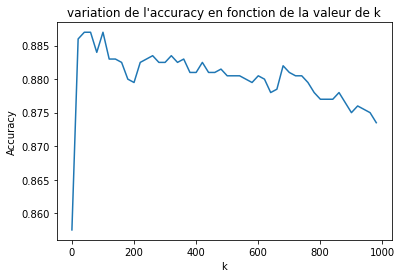

In [24]:
# Tracer le graphe de variation des accuracies
k_optimal = accuracies5D_moy.index(max(accuracies5D_moy))*20+1
print("La valeur optimale de k est de : "+str(k_optimal))
plt.plot(valeurs_k, accuracies5D_moy)  
plt.ylabel('Accuracy')
plt.xlabel("k")
plt.title("variation de l'accuracy en fonction de la valeur de k")
plt.show()

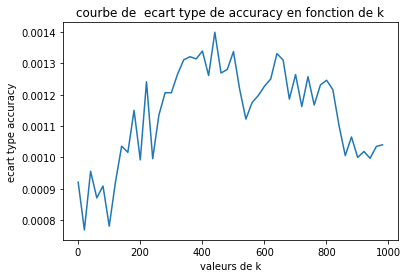

In [25]:
#tracage courbe de ecart type des accuracy en fonction de k 
plt.plot(valeurs_k,accuracies5D_ecart)  
plt.ylabel('ecart type accuracy')
plt.xlabel("valeurs de k")
plt.title('courbe de  ecart type de accuracy en fonction de k')
plt.show()

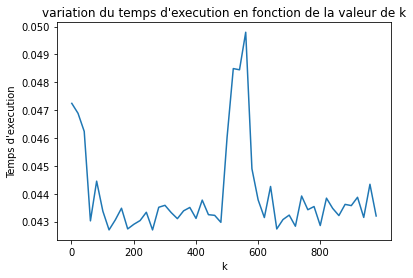

In [26]:
# Tracer le graphe du temps d'execution pour chaque k

plt.plot(valeurs_k,temps_execution5D )  
plt.ylabel('Temps d\'execution')
plt.xlabel("k")
plt.xticks(np.arange(0, seuil_k, step=200))

plt.title("variation du temps d'execution en fonction de la valeur de k")
plt.show()

##**2.   Analyse des graphes précédents**


*  **Selon le taux de bonne classification :**


Nous remarquons que notre courbe est décroissante ,

> Si k est trop grand, le modèle devient trop général et n'est donc en mesure de capturer des motifs plus fins dans nes données (Moins precis) .

> Si k est trop petit, le modèle est dit très sensible au bruit et aux valeurs aberrantes dans nos données d'entraînement, ce qui peut conduire à un surapprentissage. 

> D'apres nos experimentation la valeur optimale de k enregistrée est de *121* .

*   **Selon le temps d'éxécution :**

Nous remarquons  que la courbe de temps prends des valeurs importantes quand le k est trop grand,

> Plus k est grand plus le temps d'éxécution du KNN est élevé, car il est nécessaire de rechercher et de trier un plus grand nombre de voisins potentiels.


## **Test sur le Perceptron**

**Pour** évaluer correctement notre modèle, nous allons fournir 2 taux de bonne classification(ou accuracy) :


> 1.  Le taux de bonne classification sur la base d'apprentissage;
2.  Le taux de bonne classification sur une base de test.




   

En ce qui concerne les différentes manipulations adoptées pour effectuer ces  tests se reposent sur les principe ci dessous :

1.   Initialisation différente de w : 
 *  Initialisation a 0 .
 *  Initialisation aléatoire .


2.   Variation du learning rate .
3.   Analyse du cout d'apprentissage en fonctions des poids W .


## Test Perceptron données à 2 dimensions :

**Initialisation à zéro de w**

In [27]:
start1 = time.time()
# Pour avoir les mêmes valeurs aléatoires :
np.random.seed(42)

#Melange des index
index = np.random.permutation(len(X2D)) 
X2DM = X2D[index]
Y2DM = Y2D[index]

# on stocke les accuracies dans une liste :
accuracies_train2D = []
accuracies_test2D = []
eps_valeurs =np.arange(0,0.1,0.005)
temps_exec_2D = []
accuracies_test2D_ecarttype = []
# Création d'un perceptron avec initialisation à 0 et le learning_rate ci-dessous:
for eps in eps_valeurs :
  #eps_valeurs.append(eps)
  poids_0 = True
  dim = 2
  perceptron1 =  ClassifierPerceptron(dim, learning_rate=eps, init=poids_0)
  occur_moyenne_train = 0
  occur_moyenne_test = []
  temps_exec_2D_bis = []
  start = time.time()
  for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(X2DM, Y2DM, niter, i)
    perceptron1.train(Xapp , Yapp)
    occur_moyenne_train += perceptron1.accuracy(Xapp , Yapp)
    occur_moyenne_test.append(perceptron1.accuracy(Xtest , Ytest))
    temps_exec_2D_bis.append(time.time()-start)
  temps_exec_2D.append(np.mean(temps_exec_2D_bis))
  occur_moyenne_train /= niter
  occur_moy_test = np.mean(occur_moyenne_test)
  print("pour epsilon = ",eps,"occuracy moyenne de train =",occur_moyenne_train,"occurarcy moyenne de test =",occur_moy_test)
  accuracies_train2D.append(occur_moyenne_train)
  accuracies_test2D.append(occur_moy_test)
  accuracies_test2D_ecarttype.append(np.var(occur_moyenne_test))
  
print("temps d'execution :", time.time()-start1)

pour epsilon =  0.0 occuracy moyenne de train = 0.5 occurarcy moyenne de test = 0.5
pour epsilon =  0.005 occuracy moyenne de train = 0.8049444444444444 occurarcy moyenne de test = 0.807
pour epsilon =  0.01 occuracy moyenne de train = 0.7977222222222222 occurarcy moyenne de test = 0.7849999999999999
pour epsilon =  0.015 occuracy moyenne de train = 0.7750555555555556 occurarcy moyenne de test = 0.775
pour epsilon =  0.02 occuracy moyenne de train = 0.8015555555555555 occurarcy moyenne de test = 0.8009999999999999
pour epsilon =  0.025 occuracy moyenne de train = 0.7859444444444443 occurarcy moyenne de test = 0.7825
pour epsilon =  0.03 occuracy moyenne de train = 0.7998333333333333 occurarcy moyenne de test = 0.8009999999999999
pour epsilon =  0.035 occuracy moyenne de train = 0.7812777777777777 occurarcy moyenne de test = 0.7705
pour epsilon =  0.04 occuracy moyenne de train = 0.7567222222222223 occurarcy moyenne de test = 0.7515
pour epsilon =  0.045 occuracy moyenne de train = 0.77

**Visualisation du graphe :**

La valeur optimale du learning rate est de : 0.085


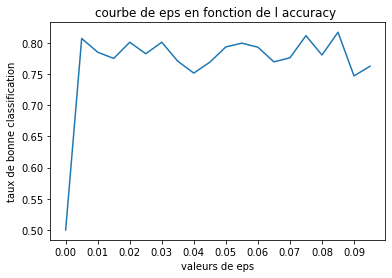

In [28]:
# Traçage de la courbe de learning rate en fonction de l'accuracy 
eps_optimal = accuracies_test2D.index(max(accuracies_test2D))*0.005
print("La valeur optimale du learning rate est de : "+str(eps_optimal))

plt.plot(eps_valeurs,accuracies_test2D)  
plt.ylabel('taux de bonne classification')
plt.xlabel("valeurs de eps")
plt.xticks(np.arange(0, 0.1, step=0.01))
plt.title('courbe de eps en fonction de l accuracy ')
plt.show()

La valeur optimale du learning rate est de : 0.085


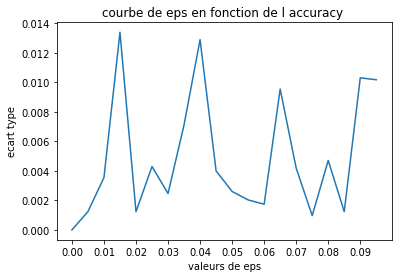

In [29]:
# Traçage de la courbe de learning rate en fonction de l'ecart type de l'accuracy 
eps_optimal = accuracies_test2D.index(max(accuracies_test2D))*0.005
print("La valeur optimale du learning rate est de : "+str(eps_optimal))

plt.plot(eps_valeurs,accuracies_test2D_ecarttype)  
plt.ylabel('ecart type')
plt.xlabel("valeurs de eps")
plt.xticks(np.arange(0, 0.1, step=0.01))
plt.title('courbe de eps en fonction de l accuracy ')
plt.show()

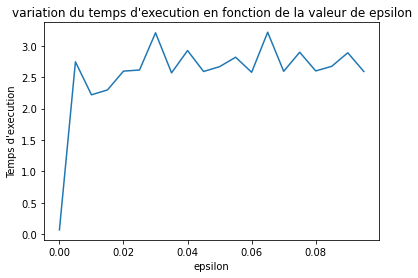

In [30]:
# Tracer le graphe du temps d'execution pour chaque k

plt.plot(eps_valeurs,temps_exec_2D )  
plt.ylabel('Temps d\'execution')
plt.xlabel("epsilon")
plt.title("variation du temps d'execution en fonction de la valeur de epsilon")
plt.show()

**Initialisation aléatoire de w**

In [31]:
start1 = time.time()
# Pour avoir les mêmes valeurs aléatoires :
np.random.seed(42)

#Melange des index
index = np.random.permutation(len(X2D)) 
X2DM = X2D[index]
Y2DM = Y2D[index]

# on stocke les accuracies dans une liste :
accuracies_train2DRandom = []
accuracies_test2DRandom = []
accuracies_test2DRandom_ecarttype = []
eps_valeurs =np.arange(0,0.1,0.005)
time_exec_2D = []

# Création d'un perceptron avec initialisation à 0 et le learning_rate ci-dessous:
for eps in eps_valeurs :
  #eps_valeurs.append(eps)
  poids_0 = False
  dim = 2
  perceptron1 =  ClassifierPerceptron(dim, learning_rate=eps, init=poids_0)
  occur_moyenne_train = 0
  occur_moyenne_test = []
  time_exec_2D_biais = []
  start = time.time()
  for i in range(niter):
    Xapp,Yapp,Xtest,Ytest = crossval_strat(X2DM, Y2DM, niter, i)
    perceptron1.train(Xapp , Yapp)
    occur_moyenne_train += perceptron1.accuracy(Xapp , Yapp)
    occur_moyenne_test.append(perceptron1.accuracy(Xtest , Ytest))
    time_exec_2D_biais.append(time.time()-start)
  time_exec_2D.append(np.mean(time_exec_2D_biais))
  occur_moyenne_train /= niter
  occur_moy_test = np.mean(occur_moyenne_test)
  time_exec_2D.append(np.mean(time_exec_2D_biais))
  print("pour epsilon = ",eps,"occuracy moyenne de train =",occur_moyenne_train,"occurarcy moyenne de test =",occur_moy_test)
  accuracies_train2DRandom.append(occur_moyenne_train)
  accuracies_test2DRandom.append(occur_moy_test)
  accuracies_test2DRandom_ecarttype.append(np.var(occur_moyenne_test))
  
print("temps d'execution :", time.time()-start1)

pour epsilon =  0.0 occuracy moyenne de train = 0.5130000000000001 occurarcy moyenne de test = 0.513
pour epsilon =  0.005 occuracy moyenne de train = 0.7607222222222223 occurarcy moyenne de test = 0.7739999999999999
pour epsilon =  0.01 occuracy moyenne de train = 0.8183333333333334 occurarcy moyenne de test = 0.8150000000000001
pour epsilon =  0.015 occuracy moyenne de train = 0.7476111111111112 occurarcy moyenne de test = 0.751
pour epsilon =  0.02 occuracy moyenne de train = 0.8163333333333332 occurarcy moyenne de test = 0.8115
pour epsilon =  0.025 occuracy moyenne de train = 0.8085555555555555 occurarcy moyenne de test = 0.8164999999999999
pour epsilon =  0.03 occuracy moyenne de train = 0.8218888888888888 occurarcy moyenne de test = 0.8324999999999999
pour epsilon =  0.035 occuracy moyenne de train = 0.7731111111111112 occurarcy moyenne de test = 0.7865
pour epsilon =  0.04 occuracy moyenne de train = 0.7859999999999999 occurarcy moyenne de test = 0.784
pour epsilon =  0.045 occ

##Visualisation du graphe ✈

La valeur optimale du learning rate est de : 0.03


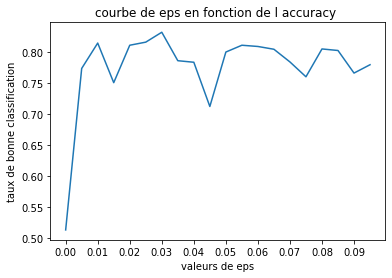

In [32]:
# Traçage de la courbe de learning rate en fonction de l'accuracy 
eps_optimal = accuracies_test2DRandom.index(max(accuracies_test2DRandom))*0.005
print("La valeur optimale du learning rate est de : "+str(eps_optimal))

plt.plot(eps_valeurs,accuracies_test2DRandom)  
plt.ylabel('taux de bonne classification')
plt.xlabel("valeurs de eps")
plt.xticks(np.arange(0, 0.1, step=0.01))
plt.title('courbe de eps en fonction de l accuracy ')
plt.show()

La valeur optimale du learning rate est de : 0.085


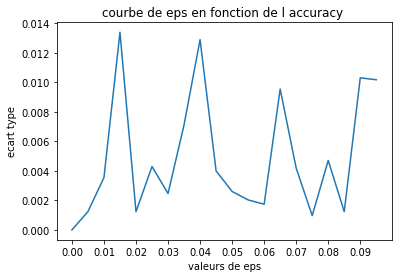

In [33]:
# Traçage de la courbe de learning rate en fonction de l'ecart type de l'accuracy 
eps_optimal = accuracies_test2D.index(max(accuracies_test2D))*0.005
print("La valeur optimale du learning rate est de : "+str(eps_optimal))

plt.plot(eps_valeurs,accuracies_test2D_ecarttype)  
plt.ylabel('ecart type')
plt.xlabel("valeurs de eps")
plt.xticks(np.arange(0, 0.1, step=0.01))
plt.title('courbe de eps en fonction de l accuracy ')
plt.show()

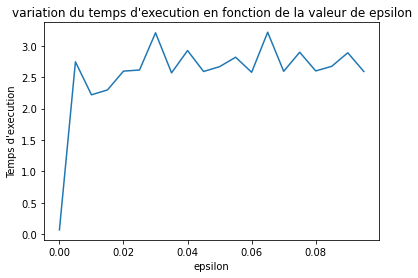

In [34]:
# Tracer le graphe du temps d'execution pour chaque k

plt.plot(eps_valeurs,temps_exec_2D )  
plt.ylabel('Temps d\'execution')
plt.xlabel("epsilon")
plt.title("variation du temps d'execution en fonction de la valeur de epsilon")
plt.show()

**Analyse**
Nous remarquons que le temps d'execution est plus optimal lorsqu'on fait une initialisation aléatoire de W, car pour une initalisation aléatoire le modéle peut apprendre de maniére plus efficace

# Test Perceptron sur données à 5 dimensions :

##Initialisation à zero de W

In [35]:

index = np.random.permutation(len(X5D)) # mélange des index
X5DMelange = X5D[index]
Y5DMelange = Y5D[index]

# Paramètres pour le perceptron:
# dimension deja initialsé a 5
poids_0 = True   # valeur initiale des poids à 0
dimension = 5 
nbr_iteration = 10

# -----
# Apprentissage du perceptron et mémorisation de l'accuracy à chaque étape:
train_acc_5DZero = []
test_acc_5DZero_ecarttype = []
test_acc_5DZero = []
time_exec_5D = []
# Pour avoir le temps d'exection
valeurs_learning_rate = np.arange(0,0.1,0.005)

start1 = time.time()
# Variation du learning rate :
for learning_rate in valeurs_learning_rate :

    perceptron = ClassifierPerceptron(dimension, learning_rate, init=poids_0)
    train_acc_moyenne = 0
    test_acc_moyenne = []
    time_exec_5D_biais = []
    start = time.time()
    for i in range(nbr_iteration):

        Xapp,Yapp,Xtest,Ytest = crossval_strat(X5DMelange, Y5DMelange, 10, i)

        perceptron.train(Xapp , Yapp) # Entrainement 

        train_acc_moyenne +=perceptron.accuracy(Xapp , Yapp)
        test_acc_moyenne.append(perceptron.accuracy(Xtest , Ytest))
        time_exec_5D_biais.append( time.time() - start )
    time_exec_5D.append(np.mean(time_exec_5D_biais))
    train_acc_moyenne /= nbr_iteration
    test_acc_moy = np.mean(test_acc_moyenne)

    train_acc_5DZero.append(train_acc_moyenne)
    test_acc_5DZero.append(test_acc_moy)
    test_acc_5DZero_ecarttype.append(np.var(test_acc_moyenne))

    print("Pour un learnig rate de : ", learning_rate, " , La moyenne d'accuracy sur le data set: \n\t\t d'entrainemet est de : ",train_acc_moyenne , "\n\t\t de test est de : ",test_acc_moy   )
    
print("Durée d'execution :", time.time()-start1)

Pour un learnig rate de :  0.0  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.5 
		 de test est de :  0.5
Pour un learnig rate de :  0.005  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.8485555555555555 
		 de test est de :  0.8440000000000001
Pour un learnig rate de :  0.01  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.8384999999999998 
		 de test est de :  0.8400000000000001
Pour un learnig rate de :  0.015  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.8243333333333334 
		 de test est de :  0.836
Pour un learnig rate de :  0.02  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.8452777777777779 
		 de test est de :  0.8465
Pour un learnig rate de :  0.025  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.8240555555555555 
		 de test est de :  0.817
Pour un learnig rate de :  0.03  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet es

## Visualisation du graphe

La valeur optimale du learning rate est de : 0.04
La valeur max des accuracies : 0.8549999999999999


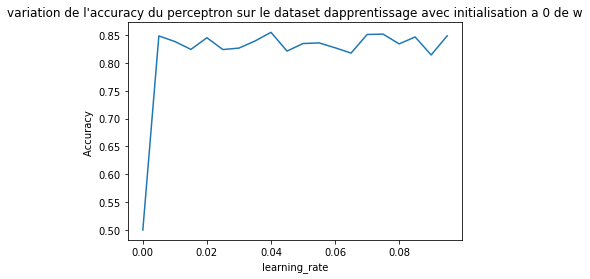

In [36]:

# Tracer le graphe de variation des accuracies sur le dataset de  train
eps_optimal = train_acc_5DZero.index(max(train_acc_5DZero))*0.005
print("La valeur optimale du learning rate est de : "+str(eps_optimal))
print("La valeur max des accuracies : "+str(max(train_acc_5DZero)))

plt.plot(valeurs_learning_rate, train_acc_5DZero)  
plt.ylabel('Accuracy ')
plt.xlabel("learning_rate")
plt.title("variation de l'accuracy du perceptron sur le dataset dapprentissage avec initialisation a 0 de w")
plt.show()

La valeur optimale du learning rate est de : 0.075


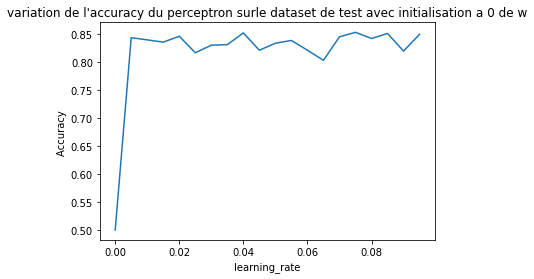

In [37]:

# Tracer le graphe de variation des accuracies sur le dataset de  test
eps_optimal = test_acc_5DZero.index(max(test_acc_5DZero))*0.005
print("La valeur optimale du learning rate est de : "+str(eps_optimal)) 

plt.plot(valeurs_learning_rate, test_acc_5DZero)  
plt.ylabel('Accuracy ')
plt.xlabel("learning_rate")
plt.title("variation de l'accuracy du perceptron surle dataset de test avec initialisation a 0 de w")
plt.show()

La valeur optimale du learning rate est de : 0.075


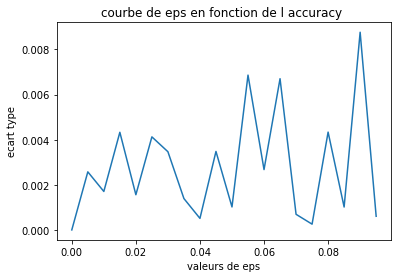

In [38]:
# Traçage de la courbe de learning rate en fonction de l'ecart type de l'accuracy 
eps_optimal = test_acc_5DZero.index(max(test_acc_5DZero))*0.005
print("La valeur optimale du learning rate est de : "+str(eps_optimal)) 

plt.plot(valeurs_learning_rate,test_acc_5DZero_ecarttype)  
plt.ylabel('ecart type')
plt.xlabel("valeurs de eps")
plt.title('courbe de eps en fonction de l accuracy ')
plt.show()

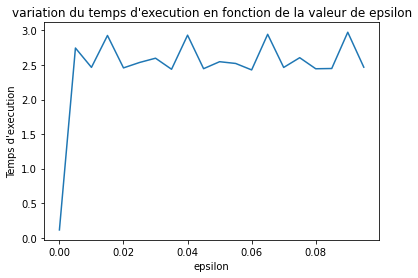

In [39]:
# Tracer le graphe du temps d'execution pour chaque k

plt.plot(valeurs_learning_rate,time_exec_5D )  
plt.ylabel('Temps d\'execution')
plt.xlabel("epsilon")
plt.title("variation du temps d'execution en fonction de la valeur de epsilon")
plt.show()

## Initialisation aleaoire de W

In [40]:

# Paramètres pour le perceptron:
# dimension deja initialsé a 5
poids_0 = False   # valeur initialisée aleatoirement

# -----
# Apprentissage du perceptron et mémorisation de l'accuracy à chaque étape:
train_acc_5DRandom = []
test_acc_5DRandom = []
test_acc_5DRandom_ecarttype = []
time_exec_5D = []
# Pour avoir le temps d'exection
start1 = time.time()

# Variation du learning rate :
for learning_rate in valeurs_learning_rate:

    perceptron = ClassifierPerceptron(dimension, learning_rate, init=poids_0)
    train_acc_moyenne = 0
    test_acc_moyenne = []
    time_exec_5D_biais = []
    start = time.time()
    for i in range(nbr_iteration):

        Xapp,Yapp,Xtest,Ytest = crossval_strat(X5DMelange, Y5DMelange, 10, i)

        perceptron.train(Xapp , Yapp) # Entrainement 

        train_acc_moyenne +=perceptron.accuracy(Xapp , Yapp)
        test_acc_moyenne.append(perceptron.accuracy(Xtest , Ytest))
        time_exec_5D_biais.append(time.time()-start)

    time_exec_5D.append(np.mean(time_exec_5D_biais))
    train_acc_moyenne /= nbr_iteration
    test_acc_moy =np.mean(test_acc_moyenne)

    train_acc_5DRandom.append(train_acc_moyenne)
    test_acc_5DRandom.append(test_acc_moy)
    test_acc_5DRandom_ecarttype.append(np.var(test_acc_moyenne))
    print("Pour un learnig rate de : ", learning_rate, " , La moyenne d'accuracy sur le data set: \n\t\t d'entrainemet est de : ",train_acc_moyenne , "\n\t\t de test est de : ",test_acc_moy  )
    
print("Durée d'execution :", time.time()-start1)

Pour un learnig rate de :  0.0  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.5035000000000001 
		 de test est de :  0.5035000000000001
Pour un learnig rate de :  0.005  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.7951111111111112 
		 de test est de :  0.7925000000000001
Pour un learnig rate de :  0.01  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.8156111111111113 
		 de test est de :  0.8164999999999999
Pour un learnig rate de :  0.015  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.8116666666666668 
		 de test est de :  0.8074999999999999
Pour un learnig rate de :  0.02  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.8495000000000001 
		 de test est de :  0.844
Pour un learnig rate de :  0.025  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.8274999999999999 
		 de test est de :  0.8425
Pour un learnig rate de :  0.03  , La moyenne d'acc

La valeur optimale du learning rate est de : 0.06
La valeur max des accuracies : 0.8656666666666666


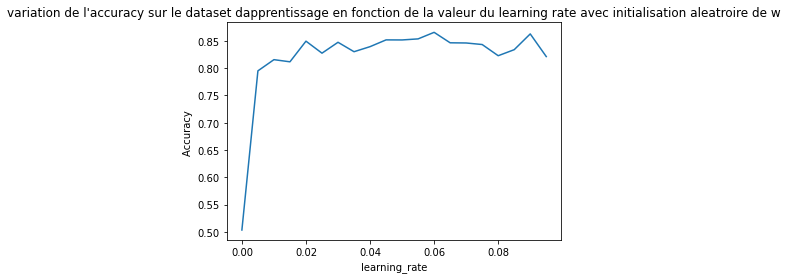

In [41]:
# Tracer le graphe de variation des accuracies sur le dataset de  train
eps_optimal = train_acc_5DRandom.index(max(train_acc_5DRandom))*0.005
print("La valeur optimale du learning rate est de : "+str(eps_optimal))
print("La valeur max des accuracies : "+str(max(train_acc_5DRandom)))


plt.plot(valeurs_learning_rate, train_acc_5DRandom)  
plt.ylabel('Accuracy ')
plt.xlabel("learning_rate")
plt.title("variation de l'accuracy sur le dataset dapprentissage en fonction de la valeur du learning rate avec initialisation aleatroire de w")
plt.show()

La valeur optimale du learning rate est de : 0.09


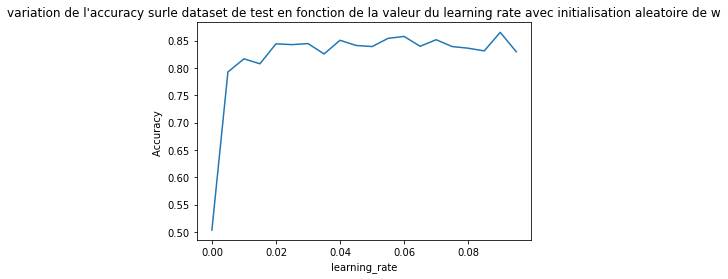

In [42]:

# Tracer le graphe de variation des accuracies sur le dataset de  test
eps_optimal = test_acc_5DRandom.index(max(test_acc_5DRandom))*0.005
print("La valeur optimale du learning rate est de : "+str(eps_optimal))

plt.plot(valeurs_learning_rate, test_acc_5DRandom)  
plt.ylabel('Accuracy ')
plt.xlabel("learning_rate")
plt.title("variation de l'accuracy surle dataset de test en fonction de la valeur du learning rate avec initialisation aleatoire de w")
plt.show()

La valeur optimale du learning rate est de : 0.09


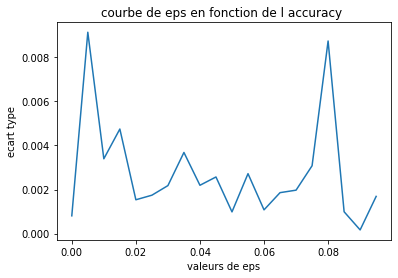

In [43]:
# Traçage de la courbe de learning rate en fonction de l'ecart type de l'accuracy 
eps_optimal = test_acc_5DRandom.index(max(test_acc_5DRandom))*0.005
print("La valeur optimale du learning rate est de : "+str(eps_optimal)) 

plt.plot(valeurs_learning_rate,test_acc_5DRandom_ecarttype)  
plt.ylabel('ecart type')
plt.xlabel("valeurs de eps")
plt.title('courbe de eps en fonction de l accuracy ')
plt.show()

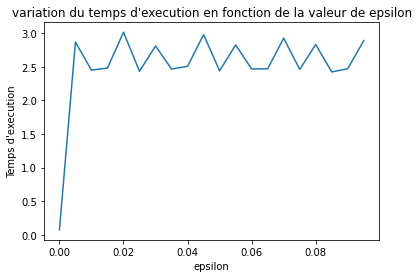

In [44]:
# Tracer le graphe du temps d'execution pour chaque k

plt.plot(valeurs_learning_rate,time_exec_5D)  
plt.ylabel('Temps d\'execution')
plt.xlabel("epsilon")
plt.title("variation du temps d'execution en fonction de la valeur de epsilon")
plt.show()

**Analyse**
Nous remarquons que le temps d'execution est plus optimal lorsqu'on fait une initialisation aléatoire de W, car pour une initalisation aléatoire le modéle peut apprendre de maniére plus efficace

## Test sur Perceptrion biais 


## Test Perceptron biais sur des données à 2 dimensions

# Initialisation à zéro de w :

In [45]:

index = np.random.permutation(len(X2D)) # mélange des index
X2DMelange = X2D[index]
Y2DMelange = Y2D[index]

# Paramètres pour le perceptronBiais:
# dimension deja initialsé a 5
poids_0 = True   # valeur initiale des poids à 0
dimension = 2
nbr_iteration = 10

# -----
# Apprentissage du perceptronBiais et mémorisation de l'accuracy à chaque étape:
train_acc_Biais2D_Zero = []
test_acc_Biais2D_Zero = []
test_acc_Biais2D_Zero_ecarttype = []
time_exec_2D = []
# Pour avoir le temps d'exection
valeurs_learning_rate = np.arange(0,0.1,0.005)

start1 = time.time()
# Variation du learning rate :
for learning_rate in valeurs_learning_rate :

    perceptronBiais = ClassifierPerceptronBiais(dimension, learning_rate, init=poids_0)
    train_acc_moyenne = 0
    test_acc_moyenne = []
    time_exec_2D_biais = []
    start = time.time()
    for i in range(nbr_iteration):

        Xapp,Yapp,Xtest,Ytest = crossval_strat(X2DMelange, Y2DMelange, 10, i)

        perceptronBiais.train(Xapp , Yapp) # Entrainement 

        train_acc_moyenne +=perceptronBiais.accuracy(Xapp , Yapp)
        test_acc_moyenne.append(perceptronBiais.accuracy(Xtest , Ytest))
        time_exec_2D_biais.append(time.time() - start )
    time_exec_2D.append(np.mean(time_exec_2D_biais))
    train_acc_moyenne /= nbr_iteration
    test_acc_moy = np.mean(test_acc_moyenne)

    train_acc_Biais2D_Zero.append(train_acc_moyenne)
    test_acc_Biais2D_Zero.append(test_acc_moy)
    test_acc_Biais2D_Zero_ecarttype.append(np.var(test_acc_moyenne))
    print("Pour un learnig rate de : ", learning_rate, " , La moyenne d'accuracy sur le data set: \n\t\t d'entrainemet est de : ",train_acc_moyenne , "\n\t\t de test est de : ",test_acc_moy  )
    
print("Durée d'execution :", time.time()-start1)

Init perceptron biais: w=  [0. 0.]  learning rate=  0.0
Pour un learnig rate de :  0.0  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.5 
		 de test est de :  0.5
Init perceptron biais: w=  [0. 0.]  learning rate=  0.005
Pour un learnig rate de :  0.005  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.8344444444444445 
		 de test est de :  0.833
Init perceptron biais: w=  [0. 0.]  learning rate=  0.01
Pour un learnig rate de :  0.01  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.8287777777777776 
		 de test est de :  0.8275
Init perceptron biais: w=  [0. 0.]  learning rate=  0.015
Pour un learnig rate de :  0.015  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.8150555555555556 
		 de test est de :  0.8164999999999999
Init perceptron biais: w=  [0. 0.]  learning rate=  0.02
Pour un learnig rate de :  0.02  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.8227222222222222

# Visualisation du graphe

La valeur optimale du learning rate est de : 0.005
La meilleure accuracy est de  : 0.8344444444444445


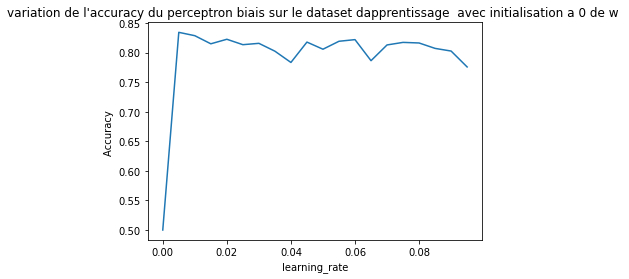

In [46]:
# Tracer le graphe de variation des accuracies sur le dataset de  train
eps_optimal = train_acc_Biais2D_Zero.index(max(train_acc_Biais2D_Zero))*0.005
print("La valeur optimale du learning rate est de : "+str(eps_optimal))
print("La meilleure accuracy est de  : "+str(max(train_acc_Biais2D_Zero)))

plt.plot(valeurs_learning_rate, train_acc_Biais2D_Zero)  
plt.ylabel('Accuracy ')
plt.xlabel("learning_rate")
plt.title("variation de l'accuracy du perceptron biais sur le dataset dapprentissage  avec initialisation a 0 de w ")
plt.show()

La valeur optimale du learning rate est de : 0.005
La meilleure accuracy est de  : 0.833


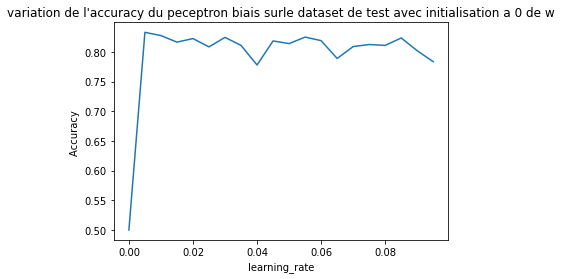

In [47]:
# Tracer le graphe de variation des accuracies sur le dataset de  test
eps_optimal = test_acc_Biais2D_Zero.index(max(test_acc_Biais2D_Zero))*0.005
print("La valeur optimale du learning rate est de : "+str(eps_optimal))
print("La meilleure accuracy est de  : "+str(max(test_acc_Biais2D_Zero)))

plt.plot(valeurs_learning_rate, test_acc_Biais2D_Zero)  
plt.ylabel('Accuracy ')
plt.xlabel("learning_rate")
plt.title("variation de l'accuracy du peceptron biais surle dataset de test avec initialisation a 0 de w")
plt.show()

La valeur optimale du learning rate est de : 0.005
La meilleure accuracy est de  : 0.833


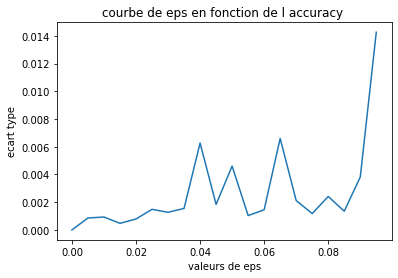

In [48]:
# Traçage de la courbe de learning rate en fonction de l'ecart type de l'accuracy 
eps_optimal = test_acc_Biais2D_Zero.index(max(test_acc_Biais2D_Zero))*0.005
print("La valeur optimale du learning rate est de : "+str(eps_optimal))
print("La meilleure accuracy est de  : "+str(max(test_acc_Biais2D_Zero)))

plt.plot(valeurs_learning_rate,test_acc_Biais2D_Zero_ecarttype)  
plt.ylabel('ecart type')
plt.xlabel("valeurs de eps")
plt.title('courbe de eps en fonction de l accuracy ')
plt.show()

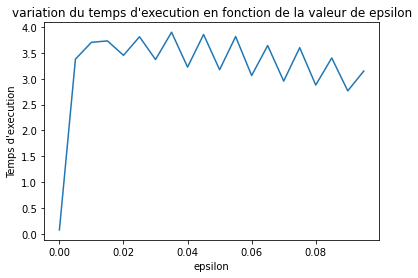

In [49]:
# Tracer le graphe du temps d'execution pour chaque k

plt.plot(valeurs_learning_rate,time_exec_2D)  
plt.ylabel('Temps d\'execution')
plt.xlabel("epsilon")
plt.title("variation du temps d'execution en fonction de la valeur de epsilon")
plt.show()

# Initialisation aléatoire de W :

In [50]:

# Paramètres pour le perceptron biais:
# dimension deja initialsé a 5
poids_0 = False   # valeur initialisée aleatoirement

# -----
# Apprentissage du perceptron biais et mémorisation de l'accuracy à chaque étape:
train_acc_Biais2D_Random = []
test_acc_Biais2D_Random = []
test_acc_Biais2D_Random_ecarttype = []
time_exec_2D = []

# Pour avoir le temps d'exection
start1 = time.time()

# Variation du learning rate :
for learning_rate in valeurs_learning_rate:

    perceptronBiais = ClassifierPerceptronBiais(dimension, learning_rate, init=poids_0)
    train_acc_moyenne = 0
    test_acc_moyenne = []
    time_exec_2D_biais= []
    start = time.time()
    for i in range(nbr_iteration):

        Xapp,Yapp,Xtest,Ytest = crossval_strat(X2DMelange, Y2DMelange, 10, i)

        perceptronBiais.train(Xapp , Yapp) # Entrainement 

        train_acc_moyenne +=perceptronBiais.accuracy(Xapp , Yapp)
        test_acc_moyenne.append(perceptronBiais.accuracy(Xtest , Ytest))
        time_exec_2D_biais.append(time.time()-start)
    time_exec_2D.append(np.mean(time_exec_2D_biais))
    train_acc_moyenne /= nbr_iteration
    test_acc_moy = np.mean(test_acc_moyenne)

    train_acc_Biais2D_Random.append(train_acc_moyenne)
    test_acc_Biais2D_Random.append(test_acc_moy)
    test_acc_Biais2D_Random_ecarttype.append(np.var(test_acc_moyenne))

    print("Pour un learnig rate de : ", learning_rate, " , La moyenne d'accuracy sur le data set: \n\t\t d'entrainemet est de : ",train_acc_moyenne , "\n\t\t de test est de : ",test_acc_moy  )
    
print("Durée d'execution :", time.time()-start1)

Init perceptron biais: w=  [-0.001  0.001]  learning rate=  0.0
Pour un learnig rate de :  0.0  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.8319999999999999 
		 de test est de :  0.8320000000000001
Init perceptron biais: w=  [-0.001 -0.001]  learning rate=  0.005
Pour un learnig rate de :  0.005  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.8317777777777777 
		 de test est de :  0.8295
Init perceptron biais: w=  [-0.001 -0.001]  learning rate=  0.01
Pour un learnig rate de :  0.01  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.8341666666666667 
		 de test est de :  0.8314999999999999
Init perceptron biais: w=  [-0.001  0.001]  learning rate=  0.015
Pour un learnig rate de :  0.015  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.8318888888888889 
		 de test est de :  0.833
Init perceptron biais: w=  [-0.001  0.001]  learning rate=  0.02
Pour un learnig rate de :  0.02  , La moyenne d'ac

# Visualisation du graphe

La valeur optimale de epsilon est de : 0.01


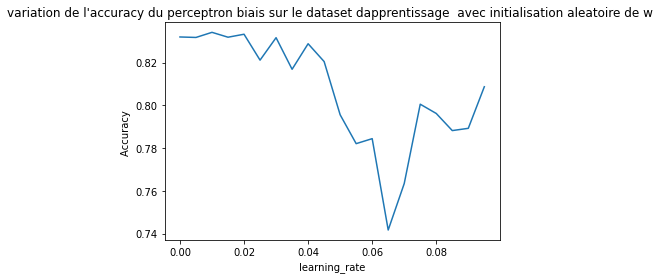

In [51]:
# Tracer le graphe de variation des accuracies sur le dataset de  train
eps_optimal = train_acc_Biais2D_Random.index(max(train_acc_Biais2D_Random))*0.005
print("La valeur optimale de epsilon est de : "+str(eps_optimal))

plt.plot(valeurs_learning_rate, train_acc_Biais2D_Random)  
plt.ylabel('Accuracy ')
plt.xlabel("learning_rate")
plt.title("variation de l'accuracy du perceptron biais sur le dataset dapprentissage  avec initialisation aleatoire de w ")
plt.show()

La valeur optimale de learning rate est de : 0.02


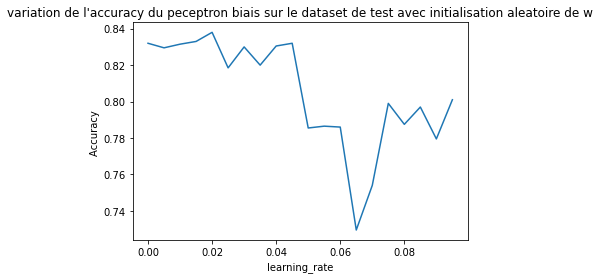

In [52]:
# Tracer le graphe de variation des accuracies sur le dataset de  test
eps_optimal = test_acc_Biais2D_Random.index(max(test_acc_Biais2D_Random))*0.005
print("La valeur optimale de learning rate est de : "+str(eps_optimal))
 
plt.plot(valeurs_learning_rate, test_acc_Biais2D_Random)  
plt.ylabel('Accuracy ')
plt.xlabel("learning_rate")
plt.title("variation de l'accuracy du peceptron biais sur le dataset de test avec initialisation aleatoire de w")
plt.show()

La valeur optimale de learning rate est de : 0.02


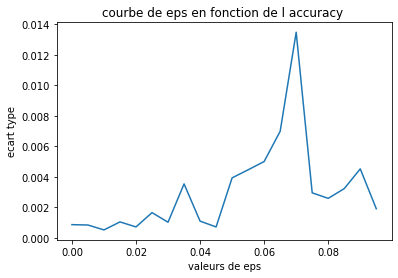

In [53]:
# Traçage de la courbe de learning rate en fonction de l'ecart type de l'accuracy 
eps_optimal = test_acc_Biais2D_Random.index(max(test_acc_Biais2D_Random))*0.005
print("La valeur optimale de learning rate est de : "+str(eps_optimal))

plt.plot(valeurs_learning_rate,test_acc_Biais2D_Random_ecarttype)  
plt.ylabel('ecart type')
plt.xlabel("valeurs de eps")
plt.title('courbe de eps en fonction de l accuracy ')
plt.show()

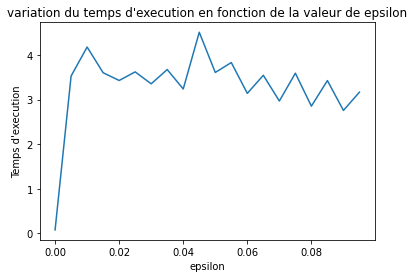

In [54]:
# Tracer le graphe du temps d'execution pour chaque k

plt.plot(valeurs_learning_rate,time_exec_2D)  
plt.ylabel('Temps d\'execution')
plt.xlabel("epsilon")
plt.title("variation du temps d'execution en fonction de la valeur de epsilon")
plt.show()

# Test Perceptron Biais données à 5 dimensions

### Initilisation à 0 de w

In [55]:

index = np.random.permutation(len(X5D)) # mélange des index
X5DMelange = X5D[index]
Y5DMelange = Y5D[index]

# Paramètres pour le perceptronBiais:
# dimension deja initialsé a 5
poids_0 = True   # valeur initiale des poids à 0
dimension = 5 
nbr_iteration = 10

# -----
# Apprentissage du perceptronBiais et mémorisation de l'accuracy à chaque étape:
train_acc_Biais5D_Zero = []
test_acc_Biais5D_Zero = []
test_acc_Biais5D_Zero_ecarttype = []
time_exec_5D = []
time_exec_5D_biais = []
# Pour avoir le temps d'exection
valeurs_learning_rate = np.arange(0,0.1,0.005)

start1 = time.time()
# Variation du learning rate :
for learning_rate in valeurs_learning_rate :

    perceptronBiais = ClassifierPerceptronBiais(dimension, learning_rate, init=poids_0)
    train_acc_moyenne = 0
    test_acc_moyenne = []
    time_exec_5D_biais = []
    start = time.time()
    for i in range(nbr_iteration):

        Xapp,Yapp,Xtest,Ytest = crossval_strat(X5DMelange, Y5DMelange, 10, i)

        perceptronBiais.train(Xapp , Yapp) # Entrainement 

        train_acc_moyenne +=perceptronBiais.accuracy(Xapp , Yapp)
        test_acc_moyenne.append(perceptronBiais.accuracy(Xtest , Ytest))
        time_exec_5D_biais.append(time.time()-start)
    time_exec_5D.append(np.mean(time_exec_5D_biais))
    train_acc_moyenne /= nbr_iteration
    test_acc_moy =np.mean(np.mean(test_acc_moyenne))

    train_acc_Biais5D_Zero.append(train_acc_moyenne)
    test_acc_Biais5D_Zero.append(test_acc_moy)
    test_acc_Biais5D_Zero_ecarttype.append(np.var(test_acc_moyenne))


    print("Pour un learnig rate de : ", learning_rate, " , La moyenne d'accuracy sur le data set: \n\t\t d'entrainemet est de : ",train_acc_moyenne , "\n\t\t de test est de : ",test_acc_moy  )
    
print("Durée d'execution :", time.time()-start1)

Init perceptron biais: w=  [0. 0. 0. 0. 0.]  learning rate=  0.0
Pour un learnig rate de :  0.0  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.5 
		 de test est de :  0.5
Init perceptron biais: w=  [0. 0. 0. 0. 0.]  learning rate=  0.005
Pour un learnig rate de :  0.005  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.8832222222222221 
		 de test est de :  0.8799999999999999
Init perceptron biais: w=  [0. 0. 0. 0. 0.]  learning rate=  0.01
Pour un learnig rate de :  0.01  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.8818333333333334 
		 de test est de :  0.8835000000000001
Init perceptron biais: w=  [0. 0. 0. 0. 0.]  learning rate=  0.015
Pour un learnig rate de :  0.015  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.8731666666666668 
		 de test est de :  0.8785000000000001
Init perceptron biais: w=  [0. 0. 0. 0. 0.]  learning rate=  0.02
Pour un learnig rate de :  0.02  , La moyenne d'ac

## Visualisation des graphes ⏰

La valeur optimale de learning rate est de : 0.005


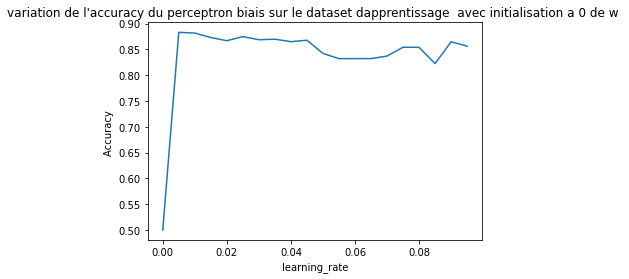

In [56]:

# Tracer le graphe de variation des accuracies sur le dataset de  train
eps_optimal = train_acc_Biais5D_Zero.index(max(train_acc_Biais5D_Zero))*0.005
print("La valeur optimale de learning rate est de : "+str(eps_optimal))

plt.plot(valeurs_learning_rate, train_acc_Biais5D_Zero)  
plt.ylabel('Accuracy ')
plt.xlabel("learning_rate")
plt.title("variation de l'accuracy du perceptron biais sur le dataset dapprentissage  avec initialisation a 0 de w ")
plt.show()

La valeur optimale de learning rate est de : 0.01


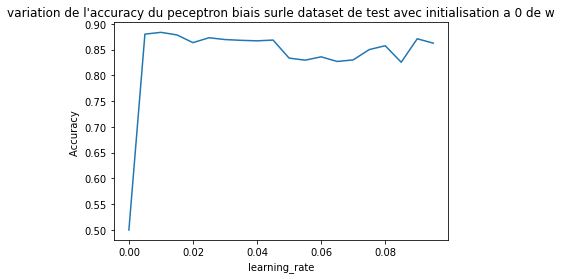

In [57]:

# Tracer le graphe de variation des accuracies sur le dataset de  test
eps_optimal = test_acc_Biais5D_Zero.index(max(test_acc_Biais5D_Zero))*0.005
print("La valeur optimale de learning rate est de : "+str(eps_optimal))

plt.plot(valeurs_learning_rate, test_acc_Biais5D_Zero)  
plt.ylabel('Accuracy ')
plt.xlabel("learning_rate")
plt.title("variation de l'accuracy du peceptron biais surle dataset de test avec initialisation a 0 de w")
plt.show()

La valeur optimale de learning rate est de : 0.01


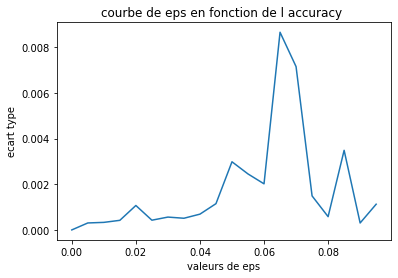

In [58]:
# Traçage de la courbe de learning rate en fonction de l'ecart type de l'accuracy 
eps_optimal = test_acc_Biais5D_Zero.index(max(test_acc_Biais5D_Zero))*0.005
print("La valeur optimale de learning rate est de : "+str(eps_optimal))

plt.plot(valeurs_learning_rate,test_acc_Biais5D_Zero_ecarttype)  
plt.ylabel('ecart type')
plt.xlabel("valeurs de eps")
plt.title('courbe de eps en fonction de l accuracy ')
plt.show()

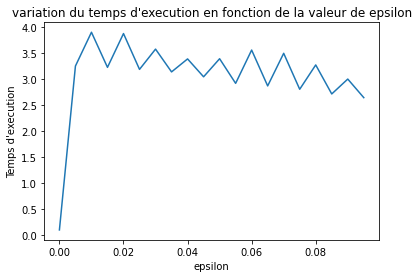

In [59]:
# Tracer le graphe du temps d'execution pour chaque k

plt.plot(valeurs_learning_rate,time_exec_5D)  
plt.ylabel('Temps d\'execution')
plt.xlabel("epsilon")
plt.title("variation du temps d'execution en fonction de la valeur de epsilon")
plt.show()

## Initialisation aleatoire de W

In [60]:

# Paramètres pour le perceptron biais:
# dimension deja initialsé a 5
poids_0 = False   # valeur initialisée aleatoirement

# -----
# Apprentissage du perceptron biais et mémorisation de l'accuracy à chaque étape:
train_acc_Biais5D_Random = []
test_acc_Biais5D_Random = []
test_acc_Biais5D_Random_ecarttype = []
time_exec_5d_random = []
# Pour avoir le temps d'exection
start1 = time.time()

# Variation du learning rate :
for learning_rate in valeurs_learning_rate:

    perceptronBiais = ClassifierPerceptronBiais(dimension, learning_rate, init=poids_0)
    train_acc_moyenne = 0
    test_acc_moyenne = []
    time_exec_5d_random_biais = []
    start = time.time()
    for i in range(nbr_iteration):

        Xapp,Yapp,Xtest,Ytest = crossval_strat(X5DMelange, Y5DMelange, 10, i)

        perceptronBiais.train(Xapp , Yapp) # Entrainement 

        train_acc_moyenne +=perceptronBiais.accuracy(Xapp , Yapp)
        test_acc_moyenne.append(perceptronBiais.accuracy(Xtest , Ytest))
        time_exec_5d_random_biais.append(time.time()-start)
    time_exec_5d_random.append(np.mean(time_exec_5d_random_biais))
    train_acc_moyenne /= nbr_iteration
    test_acc_moy = np.mean(test_acc_moyenne)


    train_acc_Biais5D_Random.append(train_acc_moyenne)
    test_acc_Biais5D_Random.append(test_acc_moy)
    test_acc_Biais5D_Random_ecarttype.append(np.var(test_acc_moyenne))
    print("Pour un learnig rate de : ", learning_rate, " , La moyenne d'accuracy sur le data set: \n\t\t d'entrainemet est de : ",train_acc_moyenne , "\n\t\t de test est de : ",test_acc_moy  )
    
print("Durée d'execution :", time.time()-start1)

Init perceptron biais: w=  [-0.001  0.001  0.001  0.001  0.001]  learning rate=  0.0
Pour un learnig rate de :  0.0  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.2515 
		 de test est de :  0.25149999999999995
Init perceptron biais: w=  [ 0.001  0.001 -0.001  0.001  0.001]  learning rate=  0.005
Pour un learnig rate de :  0.005  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.8846111111111112 
		 de test est de :  0.882
Init perceptron biais: w=  [-0.001  0.001 -0.001 -0.001  0.001]  learning rate=  0.01
Pour un learnig rate de :  0.01  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.8784444444444445 
		 de test est de :  0.8744999999999999
Init perceptron biais: w=  [ 0.001 -0.001 -0.001 -0.001 -0.001]  learning rate=  0.015
Pour un learnig rate de :  0.015  , La moyenne d'accuracy sur le data set: 
		 d'entrainemet est de :  0.8795 
		 de test est de :  0.885
Init perceptron biais: w=  [ 0.001 -0.001  0.001  0.001

## Visualisation des graphes 

La valeur optimale de learning rate est de : 0.005


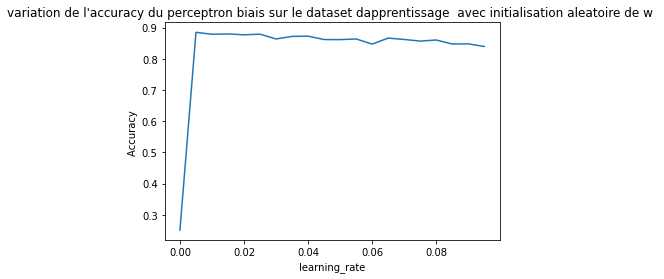

In [61]:

# Tracer le graphe de variation des accuracies sur le dataset de  train

eps_optimal = train_acc_Biais5D_Random.index(max(train_acc_Biais5D_Random))*0.005
print("La valeur optimale de learning rate est de : "+str(eps_optimal))

plt.plot(valeurs_learning_rate, train_acc_Biais5D_Random)  
plt.ylabel('Accuracy ')
plt.xlabel("learning_rate")
plt.title("variation de l'accuracy du perceptron biais sur le dataset dapprentissage  avec initialisation aleatoire de w ")
plt.show()

La valeur optimale de learning rate est de : 0.015


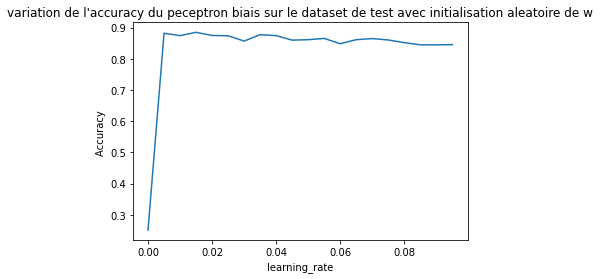

In [62]:

# Tracer le graphe de variation des accuracies sur le dataset de  test

eps_optimal = test_acc_Biais5D_Random.index(max(test_acc_Biais5D_Random))*0.005
print("La valeur optimale de learning rate est de : "+str(eps_optimal))

plt.plot(valeurs_learning_rate, test_acc_Biais5D_Random)  
plt.ylabel('Accuracy ')
plt.xlabel("learning_rate")
plt.title("variation de l'accuracy du peceptron biais sur le dataset de test avec initialisation aleatoire de w")
plt.show()

La valeur optimale du learning rate est de : 0.015


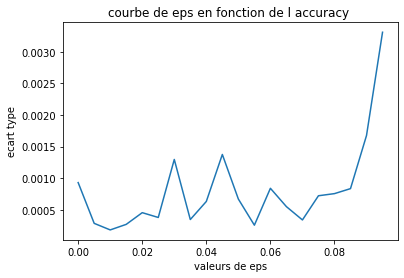

In [63]:
# Traçage de la courbe de learning rate en fonction de l'ecart type de l'accuracy 
eps_optimal = test_acc_Biais5D_Random.index(max(test_acc_Biais5D_Random))*0.005
print("La valeur optimale du learning rate est de : "+str(eps_optimal))

plt.plot(valeurs_learning_rate,test_acc_Biais5D_Random_ecarttype)  
plt.ylabel('ecart type')
plt.xlabel("valeurs de eps")
plt.title('courbe de eps en fonction de l accuracy ')
plt.show()

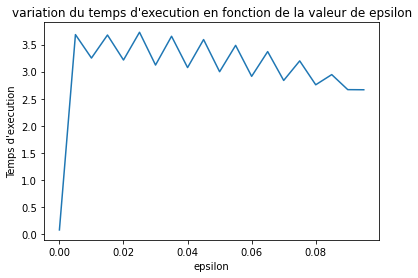

In [64]:
# Tracer le graphe du temps d'execution pour chaque k

plt.plot(valeurs_learning_rate,time_exec_5d_random )  
plt.ylabel('Temps d\'execution')
plt.xlabel("epsilon")
plt.title("variation du temps d'execution en fonction de la valeur de epsilon")
plt.show()

Nous remarquons que lorsque le leanring rate est trop petit l'algo prends enormemant de temps pour converger, pareil que losque celui ci est trop grand,

## Convergence des percetron :

## Perceptron biais ♈

Afin d'etudier la convergence du classifier **PerceptronBiais** et de selectionner les meilleurs poids, nous avons décider de suivre l'évolution du coût en fonction des valeurs de w

### *5 Dimensions :*

```
# Étude sur nos données 5D :

```



Init perceptron biais: w=  [ 0.001  0.001  0.001 -0.001 -0.001]  learning rate=  0.01


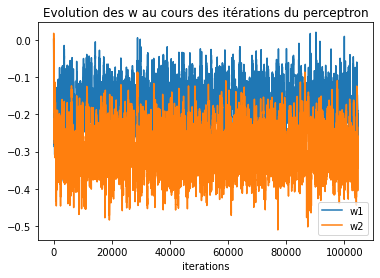

In [65]:
# Paramètres pour le perceptron:
dim = 5
eps = 0.01    # learning rate
poids_0 = False   # valeur initiale des poids à 0

perceptron_conv5 = ClassifierPerceptronBiais(dim, learning_rate=eps, init=poids_0)

perceptron_conv5.train(X5DMelange, Y5DMelange)

# récupération de l'évolution des w au cours de l'apprentissage 
# perceptron initialisé à 0
# si allw est sous forme de liste de couples [w1, w2], on doit la convertir en np.array pour la suite:
allw_perceptron5 = np.array(perceptron_conv5.get_allw()) 

plt.figure()
plt.plot(allw_perceptron5[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw_perceptron5[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])



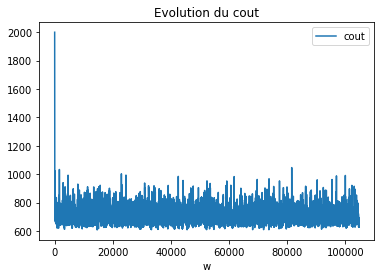

In [66]:
# Tracé de l'évolution des w:
plt.figure()
plt.plot(cout(allw_perceptron5,X5DMelange,Y5DMelange)) # première coordonnée du vecteur poids: w1
plt.title('Evolution du cout')
plt.xlabel('w')
plt.legend(['cout'])

Nous remarquons de le coût diminue au fur et a mesure de la mise a jour du vecteur W, pour enfin stagner a une valeur de 800,
Enn effet quand $w=[0,0,0,0,0]$ à le coût est élevé. L'évolions des poids du modèle parmet d' aller dans une zone de l'espace où le coût est moindre.

### 2 Dimensions :




```
# Étude sur nos données 2D :
```



Init perceptron biais: w=  [0.001 0.001]  learning rate=  0.01


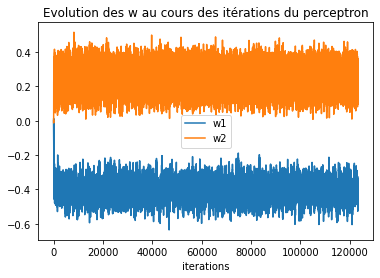

In [67]:
# Paramètres pour le perceptron:
dim = 2
eps = 0.01    # learning rate
poids_0 = False   # valeur initiale des poids à 0

perceptron_conv = ClassifierPerceptronBiais(dim, learning_rate=eps, init=poids_0)

perceptron_conv.train(X2DM, Y2DM)

allw_perceptron = np.array(perceptron_conv.get_allw()) 

plt.figure()
plt.plot(allw_perceptron[:,0]) # première coordonnée du vecteur poids: w1
plt.plot(allw_perceptron[:,1]) # deuxième coordonnée du vecteur poids: w2
plt.title('Evolution des w au cours des itérations du perceptron')
plt.xlabel('iterations')
plt.legend(['w1','w2'])



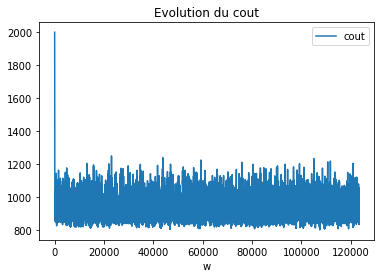

In [68]:
# Tracé de l'évolution des w:
plt.figure()
plt.plot(cout(allw_perceptron,X2DM,Y2DM)) # première coordonnée du vecteur poids: w1
plt.title('Evolution du cout')
plt.xlabel('w')
plt.legend(['cout'])

Nous remarquons de le coût diminue au fur et a mesure de la mise a jour du vecteur W, pour enfin stagner a une valeur de 1000,
Enn effet quand $w=[0,0]$ à le coût est élevé. L'évolions des poids du modèle parmet d' aller dans une zone de l'espace où le coût est moindre.

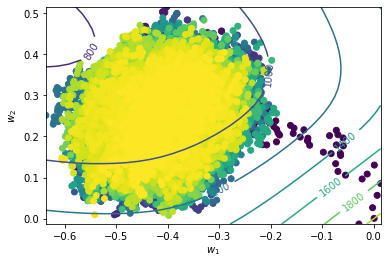

In [69]:

# 1. Construction d'une grille de 'toutes' les valeurs possibles de w dans les bornes de allw
mmax=allw_perceptron.max(0)
mmin=allw_perceptron.min(0)
x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],30),np.linspace(mmin[1],mmax[1],30))
grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))

res = np.asarray(cout(grid,X2DM,Y2DM))
##########

# remise en forme de res
res=res.reshape(x1grid.shape) 

fig, ax = plt.subplots() # pour 1 et 2
ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$')
CS = ax.contour(x1grid,x2grid,res)
ax.clabel(CS, inline=1, fontsize=10)

# ajoute de la couleur: jaune = plus grande itération
ax.scatter(allw_perceptron[:,0], allw_perceptron[:,1], c=np.arange(len(allw_perceptron)))


**Cette figure nous montre clairement l'évolution des W qui mene vers un cout moindre et donc meilleur**




 **Cette éxperimentation permet de voir que la mise à jour de W reste importante car celui-ci est lié au coût d'apprentissage et donc à la convergence de L'algorithme qui est un critère critique pour l'évaluation des performances du classifier**


# Conclusions tirées de toutes ces experimentations :

1.   Cassifier KNN :

> * Nous avons constaté que le taux de bonne classification est meilleur sur les données d'apprentissage.
> * Pour le choix du K :
>> *  Si K est trop petit, le modèle sera plus sensible aux points aberrants, on remarque donc  une plus grande variance.
>> *  D'autre part, si K est trop grand, le modèle sera moins sensible aux caractéristiques de l'ensemble de données et 
aura une plus grande erreur de biais.
> * Pour le temps d'execution :
Le temps d'exécution de notre classifier KNN dépend du nombre de voisins K :
>> * Lorsque K est petit, l'algorithme est plus rapide car il considère moins de voisins.
>> * Plus K est grand, plus le temps d'exécution est long. Cela est dû au fait que pour chaque point, l'algorithme doit trouver les K voisins les plus proches, ce qui peut être coûteux en temps pour les grands ensembles de données.


2.   Perceptron :
>> * Un learning rate élevé peut accélérer la convergence de l'algorithme,
mais peut également entraîner une divergence si la taille des mises à jour est trop grande.
D'autre part, un learning rate faible peut ralentir la convergence de l'algorithme,
mais peut également garantir la convergence si la taille des mises à jour est suffisamment petite.

3. Perceptron biais :
>> * D'aprés notre éxpérimentation un learning rate trop élevé peut entraîner une convergence rapide, mais la descente de gradient peut osciller autour du minimum, ce qui peut conduire à des performances sous-optimales. D'un autre côté, un learning rate trop faible peut entraîner une convergence lente, qui peut être très coûteuse en temps d'éxécution. Il est donc important de trouver un learning rate approprié qui permette une convergence rapide et stable, et c'est ce que nous avons essayé de faire dans notre éxpérimentation pour nos différents jeux de données .
>> * Nous remarquons que la performance du perceptron biais dépend également des caractéristiques des données d'entrée et de la complexité du problème de classification dans notre cas avec des données de 2D et 5D, le perceptron biais a de meilleure performances pour des données de 2D.

>>Nous remarquons aussi que pour les données 2D le perceptron biais a été plus performant, alors que pour les
données 5D le classifier KNN etait bien meilleur, 
=> Conclusion : les perceptron sont performant sur de données de taille petites, tandis que le KNN est meilleur lorqu'on
dispose de données plus complexes (5 dimensions dans notre cas )



